In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO
import os
import cv2
from IPython.display import display, Image

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
ROOT_DIR = '/content/gdrive/My Drive/YOLO_2'


In [ ]:
%cd /content/gdrive/My Drive/YOLO_2

/content/gdrive/My Drive/YOLO_2


In [ ]:
path1=os.path.join(ROOT_DIR, "data.yaml")

In [4]:
%cd /content/gdrive/My Drive/YOLO_2

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=80 imgsz=224 plots=True

/content/gdrive/My Drive/YOLO_2
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=80, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, sim

In [5]:
!ls runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch4130.jpg
events.out.tfevents.1688629184.5ec1b9ab97ab.1106.0  train_batch4131.jpg
F1_curve.png					    train_batch4132.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


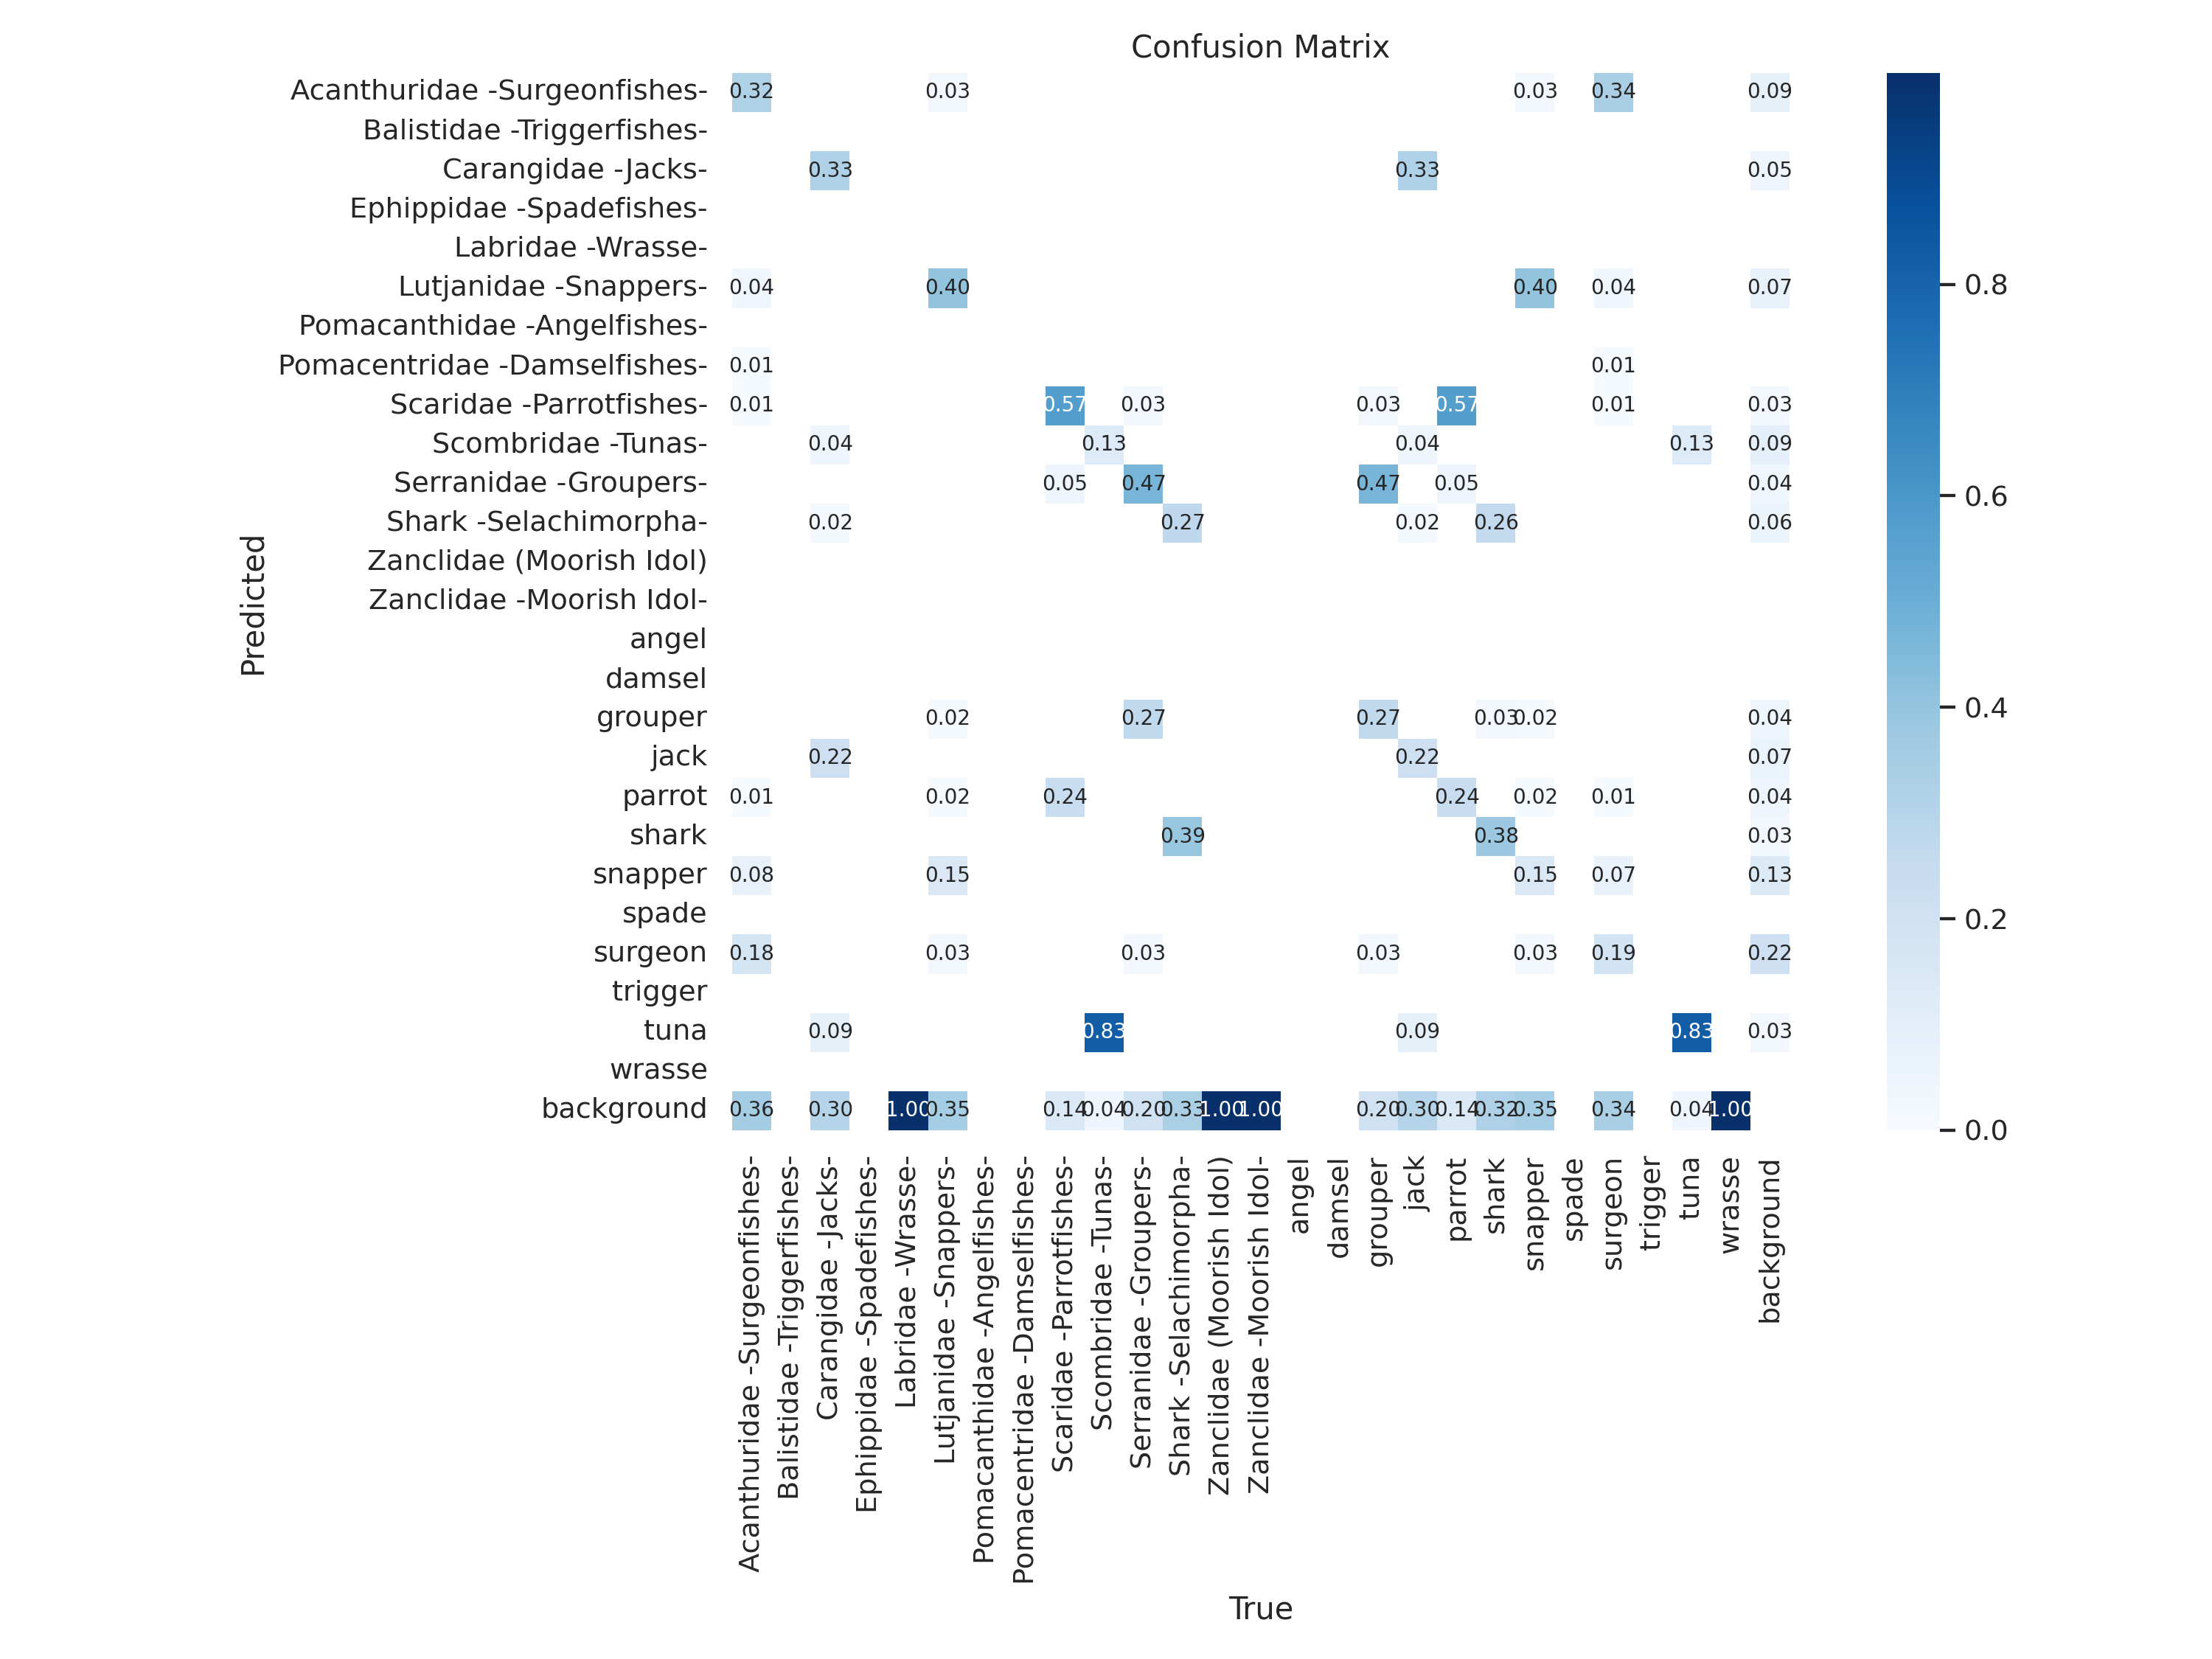

In [6]:
Image(filename='/content/gdrive/My Drive/YOLO_2/runs/detect/train/confusion_matrix.png', width=600)

In [5]:
%cd /content/gdrive/My Drive/YOLO_2
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

/content/gdrive/My Drive/YOLO_2
2023-07-07 04:17:43.658473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 04:17:44.511872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 18.0MB/s]
val: Scanning /content/gdrive/My Drive/YOLO_2/Data/valid/labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100% 270/270 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:11<00:00,  1.50it/s]
                   all        270        651       0.41   

In [6]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source=Data/test/images save=True

2023-07-07 04:18:25.300540: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 04:18:26.133472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
image 1/136 /content/gdrive/MyDrive/YOLO_2/Data/test/images/FishDataset119_png.rf.5400284ea33a58a61de4f0ae9c380c13.jpg: 224x224 7.1ms
image 2/136 /content/gdrive/MyDrive/YOLO_2/Data/test/images/FishDataset119_png.rf.qwvSqHU30Lxz48hqM6yg.jpg: 224x224 19.4ms
image 3/136 /content/gdrive/MyDrive/YOLO_2/Data/test/images/FishDataset12_png.rf.12a2d25995702339cc4f2bf69d58cfaf.jpg: 224x224 1 snapper, 8

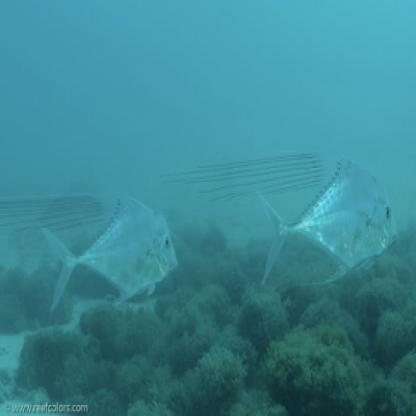

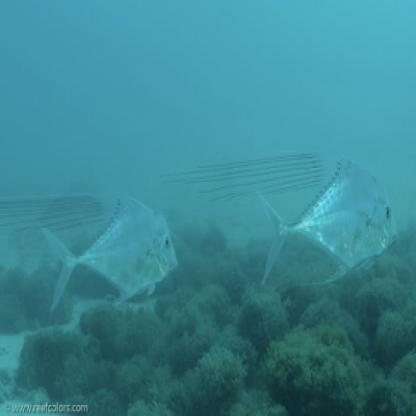

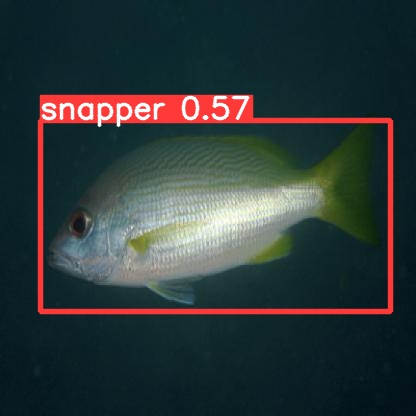

In [7]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
VIDEOS_DIR = ROOT_DIR

In [8]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.3 source="Red_Snapper.mp4" save=True

2023-07-07 04:20:08.972242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 04:20:09.808360: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/2225) /content/gdrive/MyDrive/YOLO_2/Red_Snapper.mp4: 128x224 107.7ms
video 1/1 (2/2225) /content/gdrive/MyDrive/YOLO_2/Red_Snapper.mp4: 128x224 9.7ms
video 1/1 (3/2225) /content/gdrive/MyDrive/YOLO_2/Red_Snapper.mp4: 128x224 16.0ms
video 1/1 (4/2225) /content/gdrive/MyDrive/YOLO_2/Red_Snapper.mp4: 128x224 9.5ms
video 1/1 (5/2225) /content/gdrive/MyDrive/YOLO_2/Red_Snapper.mp4: 12

In [9]:
%cd /content/gdrive/My Drive/YOLO_2
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.3 source="output.mp4" save=True

/content/gdrive/My Drive/YOLO_2
2023-07-07 04:21:30.392205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 04:21:31.207594: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/1664) /content/gdrive/My Drive/YOLO_2/output.mp4: 192x224 107.8ms
video 1/1 (2/1664) /content/gdrive/My Drive/YOLO_2/output.mp4: 192x224 25.3ms
video 1/1 (3/1664) /content/gdrive/My Drive/YOLO_2/output.mp4: 192x224 28.0ms
video 1/1 (4/1664) /content/gdrive/My Drive/YOLO_2/output.mp4: 192x224 7.6ms
video 1/1 (5/1664) /content/gdrive/My Drive/YOLO_2/o

In [10]:
%cd /content/gdrive/My Drive/YOLO_2
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source="tuna.mp4" save=True

/content/gdrive/My Drive/YOLO_2
2023-07-07 04:23:36.329485: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 04:23:37.178257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/1420) /content/gdrive/My Drive/YOLO_2/tuna.mp4: 128x224 100.2ms
video 1/1 (2/1420) /content/gdrive/My Drive/YOLO_2/tuna.mp4: 128x224 11.4ms
video 1/1 (3/1420) /content/gdrive/My Drive/YOLO_2/tuna.mp4: 128x224 10.2ms
video 1/1 (4/1420) /content/gdrive/My Drive/YOLO_2/tuna.mp4: 128x224 10.7ms
video 1/1 (5/1420) /content/gdrive/My Drive/YOLO_2/tuna.mp4

In [ ]:
%cd /content/gdrive/My Drive/YOLO_2
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source="tuna.mp4" save=True

/content/gdrive/My Drive/YOLO_2
2023-07-05 10:37:48.268597: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-05 10:37:49.241583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/1420) /content/gdrive/MyDrive/YOLO_2/tuna.mp4: 128x224 1 Shark -Selachimorpha-, 62.0ms
video 1/1 (2/1420) /content/gdrive/MyDrive/YOLO_2/tuna.mp4: 128x224 11.2ms
video 1/1 (3/1420) /content/gdrive/MyDrive/YOLO_2/tuna.mp4: 128x224 10.1ms
video 1/1 (4/1420) /content/gdrive/MyDrive/YOLO_2/tuna.mp4: 128x224 10.5ms
video 1/1 (5/1420) /content/gdr

In [11]:
%cd /content/gdrive/My Drive/YOLO_2
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source="tuna_output.mp4" save=True

/content/gdrive/My Drive/YOLO_2
2023-07-07 04:27:31.953536: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 04:27:32.792957: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 65.6ms
video 1/1 (2/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 11.9ms
video 1/1 (3/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 11.8ms
video 1/1 (4/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 7.1ms
video 1/1 (5/1420) /content/gdriv

In [12]:
%cd /content/gdrive/My Drive/YOLO_2
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.4 source="tuna_output.mp4" save=True

/content/gdrive/My Drive/YOLO_2
2023-07-07 04:29:38.734393: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 04:29:39.576311: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
video 1/1 (1/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 60.1ms
video 1/1 (2/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 7.4ms
video 1/1 (3/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 7.3ms
video 1/1 (4/1420) /content/gdrive/My Drive/YOLO_2/tuna_output.mp4: 192x224 7.2ms
video 1/1 (5/1420) /content/gdrive/

In [14]:
%cd /content/gdrive/My Drive/YOLO_2
!yolo task=detect mode=predict model=runs_original/detect/train/weights/best.pt conf=0.35 source=spade.jpg save=True

/content/gdrive/My Drive/YOLO_2
2023-07-07 06:52:20.097784: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 06:52:20.920558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs
image 1/1 /content/gdrive/My Drive/YOLO_2/spade.jpg: 160x224 2 Lutjanidae -Snappers-s, 1 snapper, 55.3ms
Speed: 0.4ms pre-process, 55.3ms inference, 84.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict8
